In [1]:
import frgtools.ftir as ftir
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
import numpy as np
import seaborn as sns
import frgtools.misc as fm
import frgtools.plotting as fplt
from matplotlib.lines import Line2D
from scipy.stats import linregress
import os
import pandas as pd

In [2]:
FTIRdata = ftir.load_pyris('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/FTIR_MRC/20210222_T8b')#os.path.join('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/UV_VIS_MRC/20201204 EuCsPbBr3 from APS, Deniz A-F Cl-I-Br sweep', '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/UV_VIS_MRC/20201204 EuCsPbBr3 from APS, Deniz A-F Cl-I-Br sweep/T+R Data'))

In [3]:
df = pd.DataFrame(FTIRdata)
df = df.T

In [4]:
name_key = {
    'A_bare': 'FAxCsPbI80Br10Cl10',
    'B_bare': 'FAxCsPbI80Br15Cl5',
    'C_bare': 'FAxCsPbI80Br19Cl1',
    'D_bare': 'FAxCsPbI80Br20Cl0',
    'A_PIB': 'FAxCsPbI80Br10Cl10+PIB',
    'B_PIB': 'FAxCsPbI80Br15Cl5+PIB',
    'C_PIB': 'FAxCsPbI80Br19Cl1+PIB',
    'D_PIB': 'FAxCsPbI80Br20Cl0+PIB',
}

In [5]:
df

,wavenumber,signal,type,filepath
A_bare,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[98.04, 98.05, 98.04, 98.04, 98.03, 98.04, 98....",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
A_PIB,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[99.28, 99.28, 99.28, 99.28, 99.28, 99.28, 99....",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
B_bare,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[96.08, 96.09, 96.09, 96.09, 96.09, 96.09, 96....",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
B_PIB,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[101.2, 101.21, 101.21, 101.21, 101.2, 101.2, ...",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
C_bare,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[99.35, 99.36, 99.35, 99.35, 99.35, 99.36, 99....",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
C_PIB,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[101.0, 101.0, 101.01, 101.01, 101.02, 101.02,...",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
D_bare,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[100.31, 100.31, 100.3, 100.3, 100.3, 100.31, ...",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...
D_PIB,"[4000.0, 3999.0, 3998.0, 3997.0, 3996.0, 3995....","[101.0, 101.01, 101.01, 101.01, 101.01, 101.0,...",Transmittance,/Volumes/GoogleDrive/My Drive/Characterization...


In [6]:
# def getname(n, q):
#     letter = df['filepath'][q].split('T8/')[1].split('.csv')[0]
#     return name_key[letter]

# def getname_2(n):
#     letter_2 = n.split('s')[1]
#     return name_key[letter_2]

df['label'] = np.array
df['reverse_wavenumber'] = np.array
for n in range(0, df.shape[0]):
    df['label'][n] = df['filepath'][n].split('T8b/')[1].split('.csv')[0]
    df['reverse_wavenumber'][n] = df['wavenumber'][n][::-1]
# df['condition'] = df['filepath'].apply(getname_2)
# df = df[['label','type', 'wavenumber','signal']]
# df2 = df2.reset_index(inplace=True)
index = np.arange(0, df.shape[0], 1)


df2 = df[['label', 'type', 'wavenumber', 'reverse_wavenumber', 'signal']]
df2 = df2.set_index([pd.Index(index)])
df = df2

In [8]:
# Filtering out bugged curves (manual entry)
# df = df[df.name != 'CsPbSnF3_25_5isl']

# plotting a subset of experiment

Filter_1 = 'bare'
Filter_2 = ''
Filter_3 = ''

df_filter1 = df[df.label.str.contains(Filter_1)]
df_filter2 = df_filter1[df_filter1.label.str.contains(Filter_2)]
df_filter3 = df_filter2[df_filter2.label.str.contains(Filter_3)]
df_filter3.reset_index(drop=True, inplace=True)

# list scans in your filtered dataset before plotting
for n in df_filter3['label'].unique(): print(n)

A_bare
B_bare
C_bare
D_bare


In [9]:
df = df_filter3 

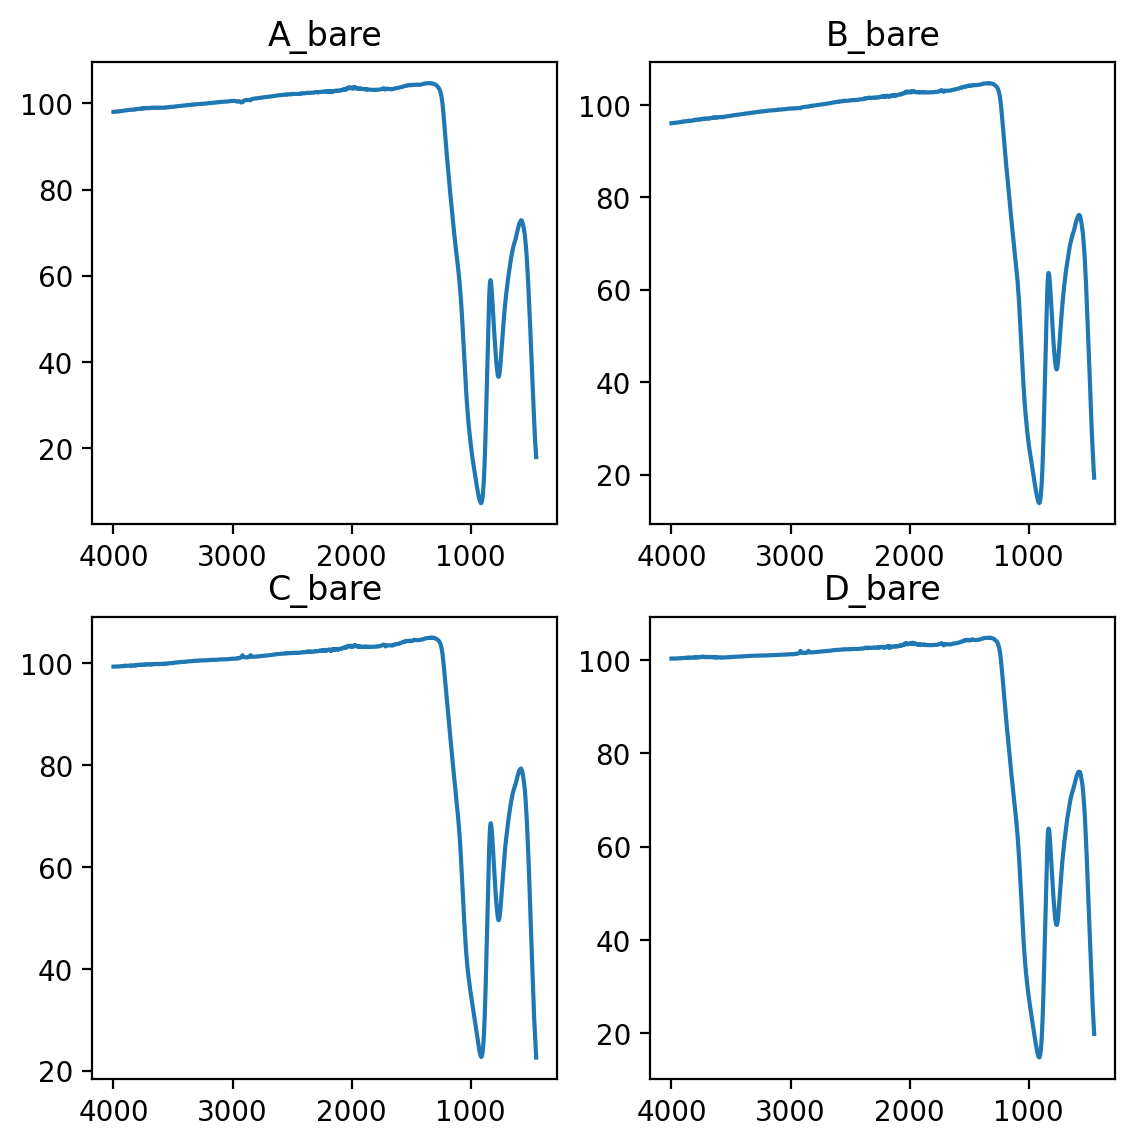

In [14]:
embiggen = 3.3
horiz = 2
vert = 2
cm1 = 'inferno'
cm2 = 'Greys'
fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen))

# for n, ax_ in zip(range(0, len(list_of_files)), ax.ravel()):
for n, ax_ in zip(range(0, df.shape[0]), ax.ravel()):

    ax_.plot(df['wavenumber'][n], df['signal'][n], label=df['label'][n])
    #     im = ax_.imshow(scan_obj.DisplayArray[:,:,1], cmap=cm1, alpha=.5)
#     a=scan_obj.DisplayArray[:,:,1]
#     a.shape
#     ax_.set_xlabel(str(a.shape))
    ax_.set_title(df['label'][n])
#     ax_.set_yticklabels([])
#     ax_.set_xticklabels([5000, 4000, 3000, 2000, 450])
    ax_.invert_xaxis()
#     divider = make_axes_locatable(ax_)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     cbar = plt.colorbar(im, cax=cax)
#     cbar.mappable.set_clim()

# plt.savefig('SiSpiro_PSK_Device_20210204
# plt.ylim(0,100)
# plt.gca().invert_yaxis()

plt.show()

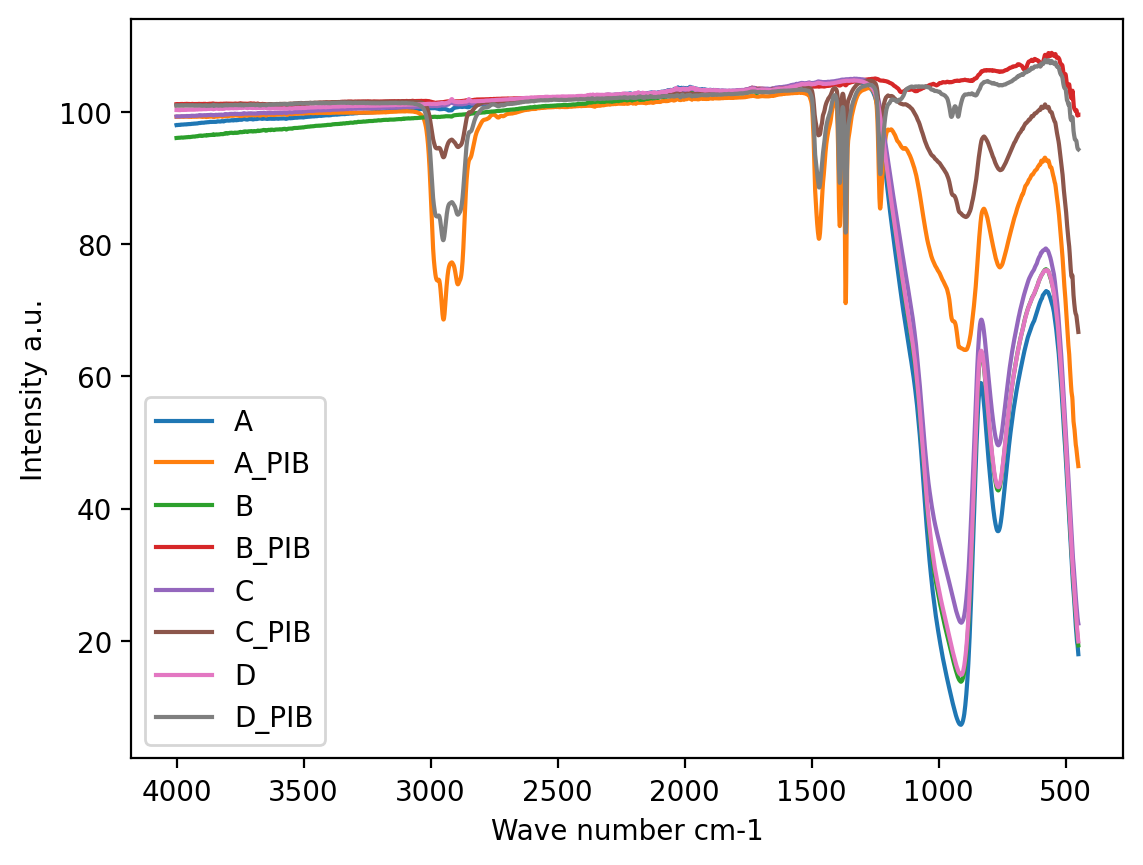

In [19]:
for n in range(0, df.shape[0]):
    plt.plot(df['wavenumber'][::-1][n], df['signal'][n], label=df['label'][n])

plt.xlabel('Wave number cm-1')
plt.ylabel('Intensity a.u.')
plt.legend()
# plt.xlim(1600, 1800)
plt.gca().invert_xaxis()
plt.show()